# Nonlinear Dimensionality Reduction

PCA is a linear method, and it may not work well for nonlinear data. One popular nonlinear method is **t-distributed stochastic neighbor embedding (t-SNE)**.

Let $x_i$ be a data point in high dimensional space, and $y_i$ be its corresponding low dimensional (e.g. 2D) representation. We want to adjust the location of $y_i$ such that if $x_i$ and $x_j$ are close in high dimensional space, then $y_i$ and $y_j$ should also be close in low dimensional space.

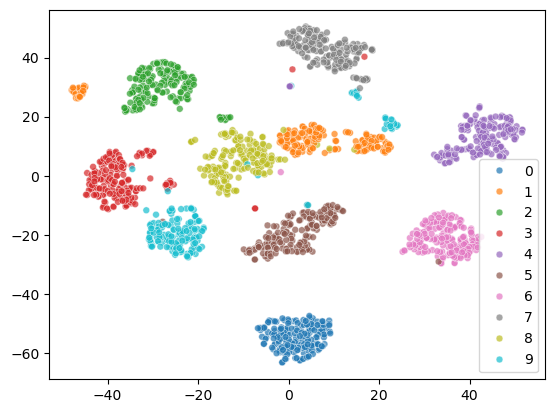

In [3]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

X,y = load_digits(return_X_y=True)

tsne = TSNE(n_components=2, random_state=0)

X_tsne = tsne.fit_transform(X)
sc = sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, legend='full', s=24, alpha=0.7, palette='tab10')

The 2D representation separates all the digits well. But some samples of the same digit are far apart, which is not ideal. Let's see what happens to the two cluster of digit 1.

From the visualization, we can see that there are two styles of digit 1.

Text(0.5, 1.0, 'Digit 1 with Max X1')

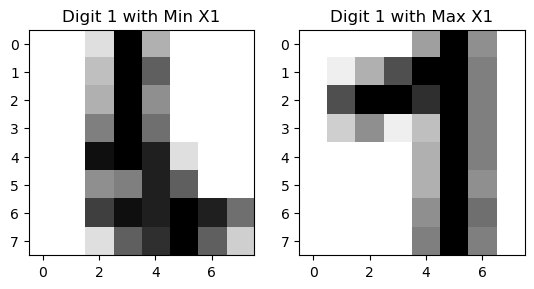

In [4]:
 
digit = 1
indices_of_digit = np.where(y == digit)[0]  # Get all indices where the digit is 3
X_tsne_digit = X_tsne[indices_of_digit]  # Filter t-SNE results for 3s

# Find the index of the minimum X1 value among all '1' digits
min_index = np.argmin(X_tsne_digit[:, 0])
actual_min_index = indices_of_digit[min_index]  # Get the actual index in the original dataset

max_index = np.argmax(X_tsne_digit[:, 0])
actual_max_index = indices_of_digit[max_index]

# Extract the corresponding image
image_of_digit_min = X[actual_min_index].reshape(8, 8)  # Reshape the flat vector back to 8x8
image_of_digit_max = X[actual_max_index].reshape(8, 8)

# Visualize the image
fig, axes = plt.subplots(1, 2)

axes[0].imshow(image_of_digit_min, cmap='binary')
axes[0].set_title('Digit 1 with Min X1')

axes[1].imshow(image_of_digit_max, cmap='binary')
axes[1].set_title('Digit 1 with Max X1')

In [17]:
# first do PCA, then t-SNE
from sklearn.decomposition import PCA
# keep 70% of variance
pca = PCA(n_components=0.7)
X_pca = pca.fit_transform(X)
tsne = TSNE(n_components=2, random_state=0)

In [18]:
X_tsne = tsne.fit_transform(X_pca)

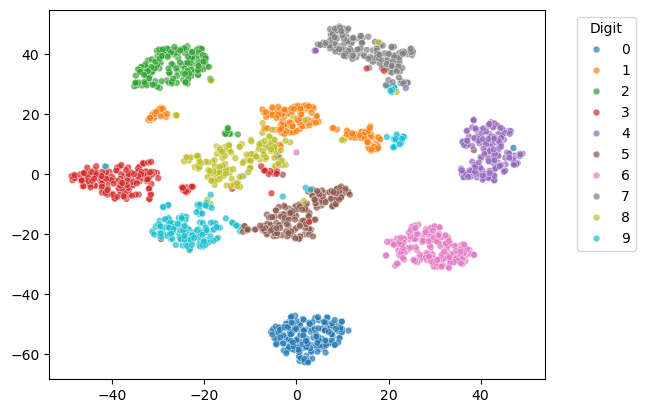

In [19]:
sc = sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, legend='full', s=24, alpha=0.7, palette='tab10')
plt.legend(title="Digit", bbox_to_anchor=(1.05, 1), loc='upper left')


## Perplexity

The perplexity is one of the most important hyperparameters in t-SNE. Perplexity controls how many neighboring points each data point tries to stay close to, so lower values tend to produce tighter, more fragmented clusters, while higher values lead to broader, more blended groupings.

For more details, see the following resources:
[How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/)

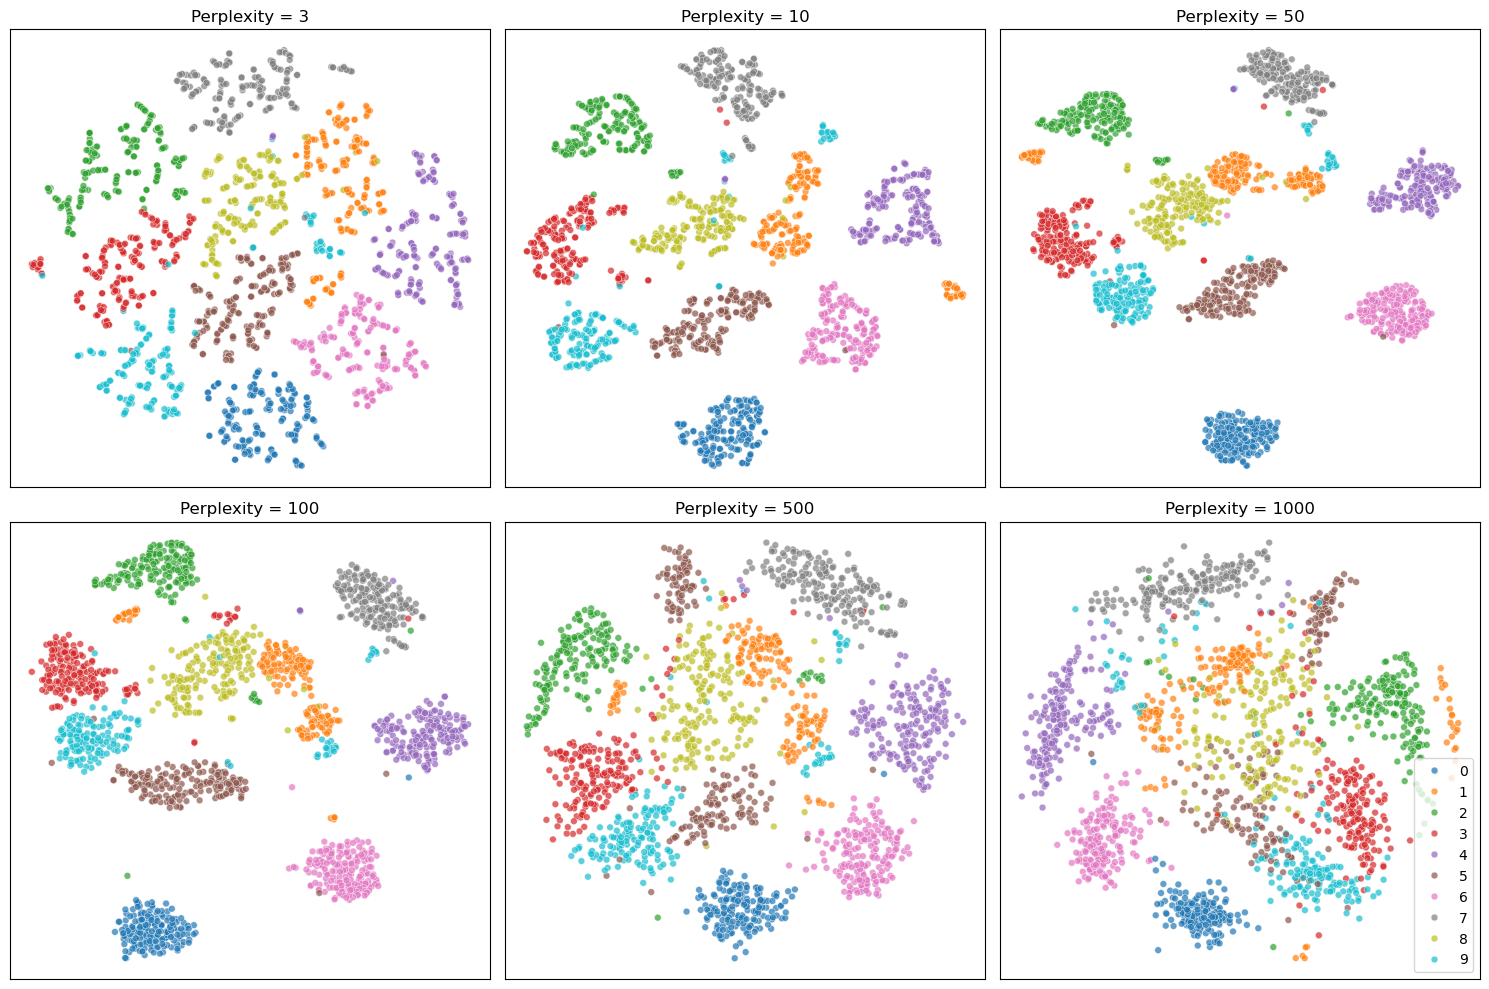

In [13]:
perplexities = [3, 10, 50, 100, 500, 1000]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, (ax, perp) in enumerate(zip(axes.flat, perplexities)):
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    X_tsne = tsne.fit_transform(X)
    # Show legend only in the last subplot
    show_legend = 'full' if i == len(perplexities) - 1 else False
    sc = sns.scatterplot(
        x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, s=24, alpha=0.7,
        palette='tab10', ax=ax, legend=show_legend
    )
    ax.set_title(f"Perplexity = {perp}")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()